In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')
df['ln_units'] = np.log(df['units'])
df.head()

,Graph ID,Tree decomposition ID,run time,units,Tree Width,Decomposition Overhead Ratio,Average Depth,Join Percentage,Forget Percentage,Introduce Percentage,Leaf Percentage,Sum of Join node distances,Branching Factor,Bag Adjacency Factor,Bag Connectedness Factor,Bag Neighborhood Coverage Factor,ln_units
0,1,1,143,2606,2.0,2.25,4.263158,0.052632,0.052632,0.052632,0.473684,0.0,1.900000,0.596491,0.280702,3.245614,7.865572
1,1,2,150,3055,2.0,2.25,4.842105,0.105263,0.052632,0.052632,0.473684,2.0,1.900000,0.596491,0.280702,3.175439,8.024535
2,1,3,152,2622,2.0,2.25,5.526316,0.157895,0.000000,0.157895,0.421053,8.0,1.727273,0.596491,0.280702,3.157895,7.871693
3,1,4,136,2699,2.0,2.25,7.052632,0.052632,0.105263,0.157895,0.315789,0.0,1.461538,0.596491,0.315789,3.070175,7.900637
4,1,5,159,2963,2.0,2.25,5.157895,0.210526,0.052632,0.157895,0.368421,30.0,1.583333,0.596491,0.350877,2.982456,7.993958


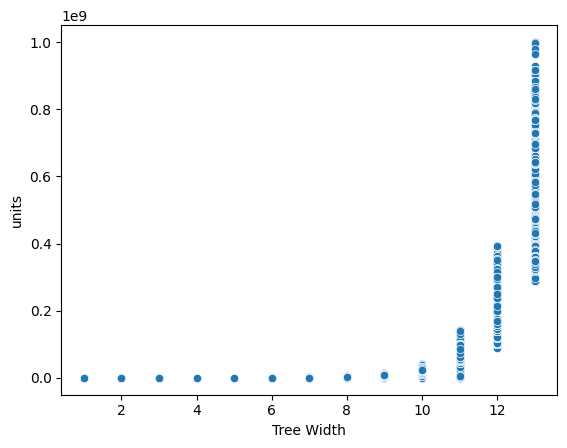

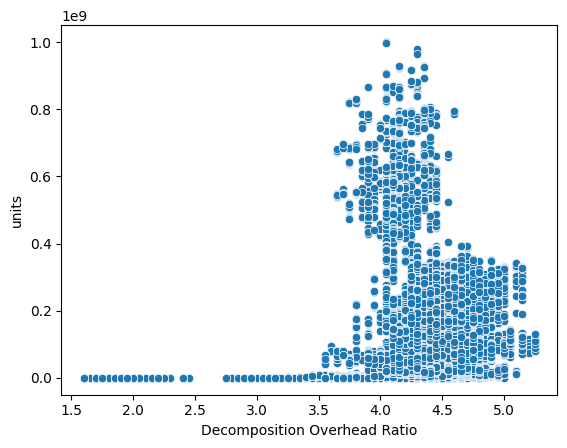

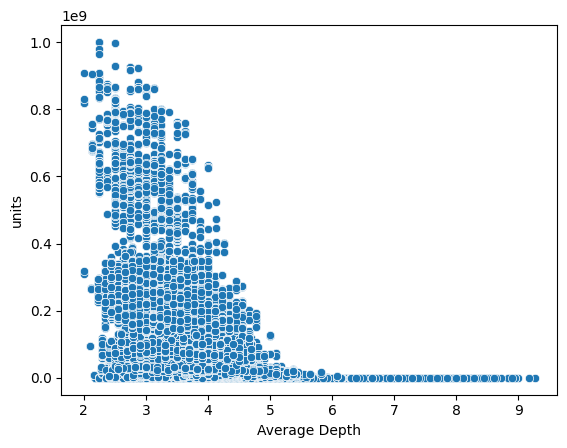

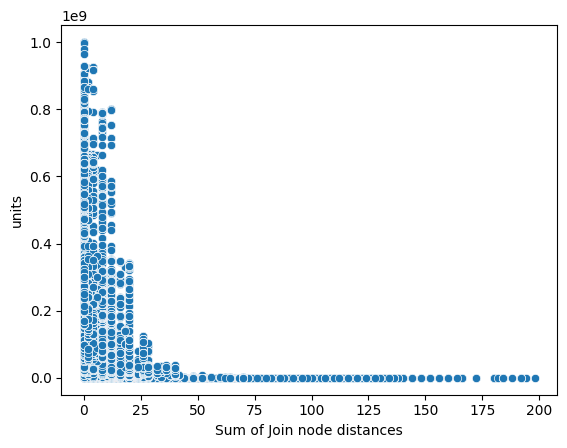

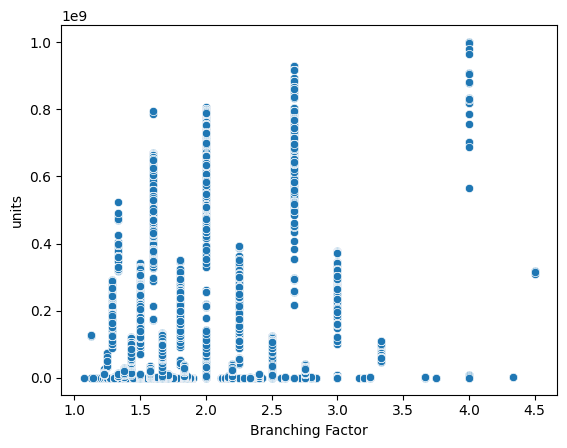

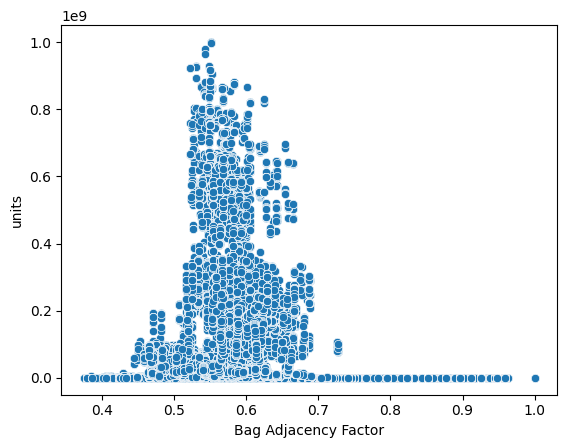

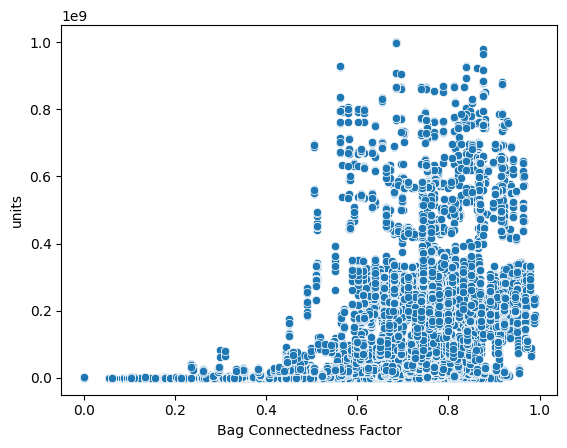

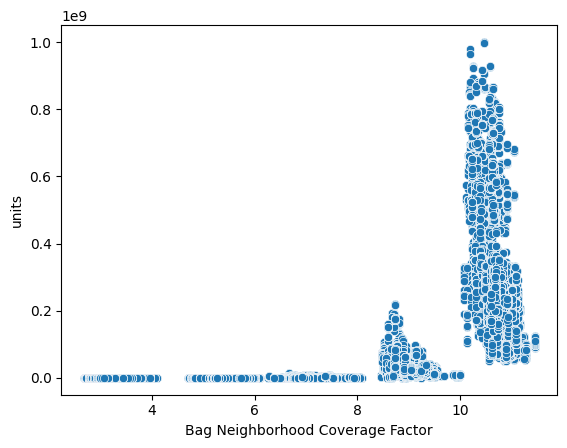

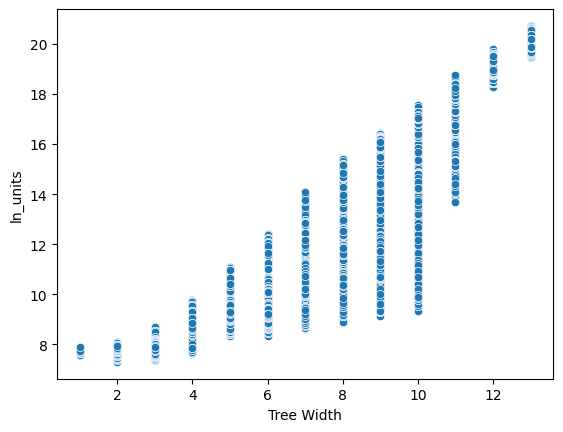

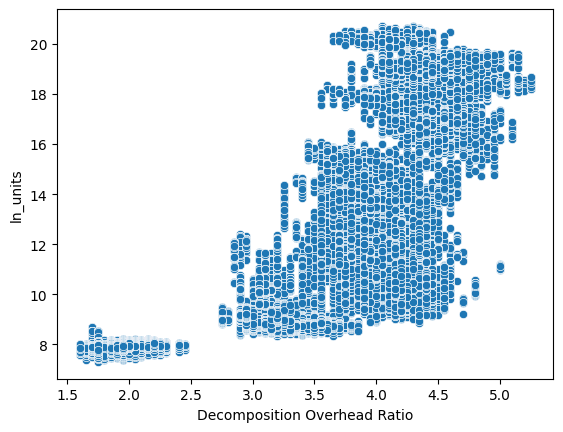

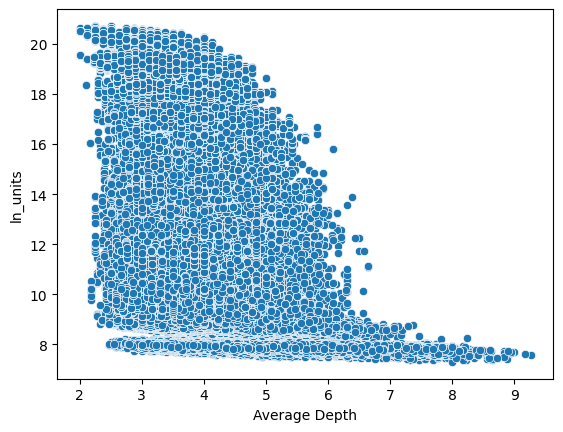

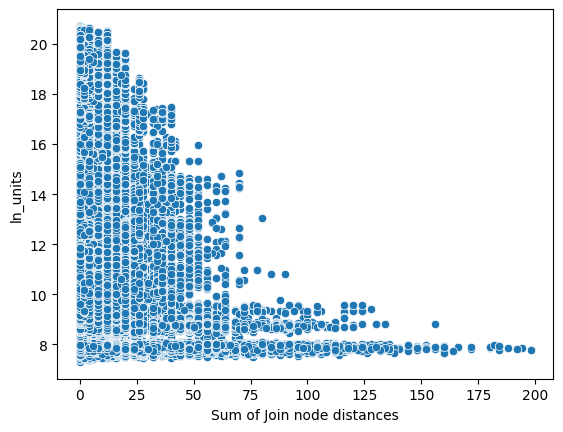

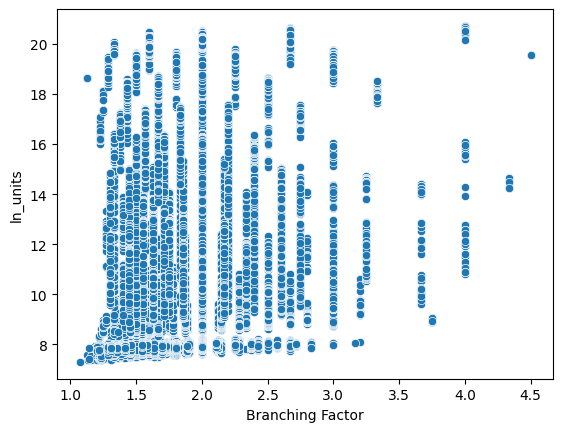

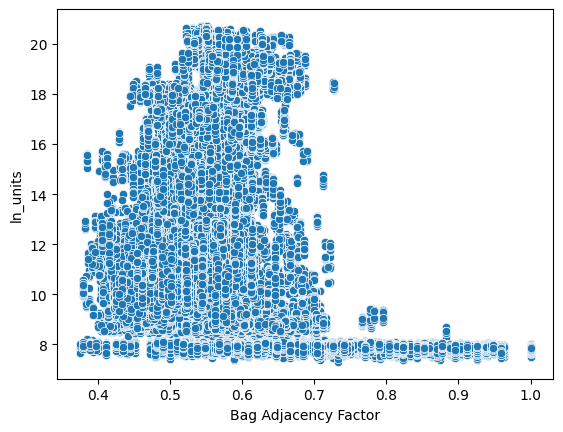

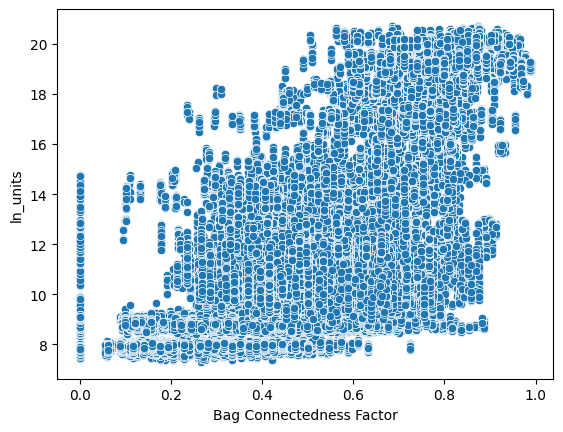

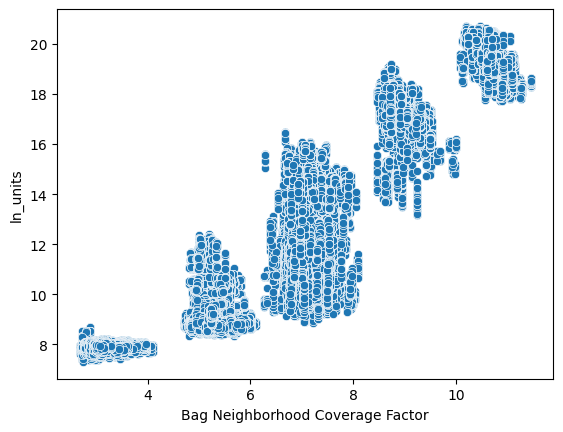

In [4]:
# sns.pairplot(df)
# plt.show()
features = ['Tree Width', 'Decomposition Overhead Ratio', 'Average Depth', 'Sum of Join node distances', 'Branching Factor', 'Bag Adjacency Factor', 'Bag Connectedness Factor', 'Bag Neighborhood Coverage Factor']
for feature in features:
    sns.scatterplot(data=df, x=feature, y="units")
    plt.show()

for feature in features:
    sns.scatterplot(data=df, x=feature, y="ln_units")
    plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

features = ['Tree Width', 'Decomposition Overhead Ratio', 'Average Depth', 'Sum of Join node distances', 'Branching Factor', 'Bag Adjacency Factor', 'Bag Connectedness Factor', 'Bag Neighborhood Coverage Factor']

df_train   = df.groupby('Graph ID').head(7)
df_predict = df.groupby('Graph ID').tail(3)

X = df_train[features]
y = df_train['units']
X_predict = df_predict[features]
y_predict = df_predict['units']

C:\Users\jerry\AppData\Local\Temp\ipykernel_32736\3164250428.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\AppData\Local\Temp\ipykernel_32736\3164250428.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\A

219.01993143912645


C:\Users\jerry\AppData\Local\Temp\ipykernel_32736\3164250428.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])


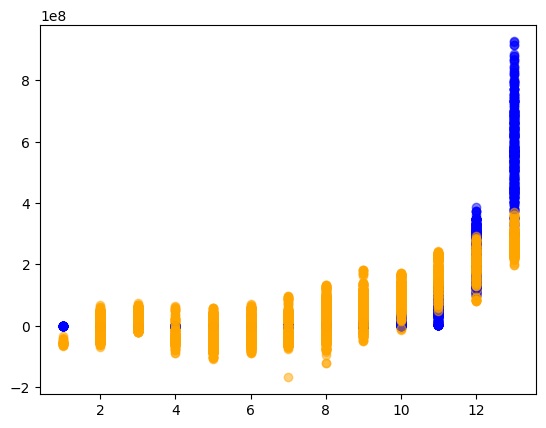

In [6]:
def simpleLinearRegression(df_train, df_predict):
    X = df_train[features]
    y = df_train['units']
    X_predict = df_predict[features]
    y_predict = df_predict['units']
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X_predict)
    
    mse = mean_squared_error(y_predict, predictions)
    plt.scatter(X_predict['Tree Width'], y_predict  , color = 'blue'  , alpha = 0.5)
    plt.scatter(X_predict['Tree Width'], predictions, color = 'orange', alpha = 0.5)
    return mse
    # print(f"MSE: {mse / 1e14}")
    # plt.show()

mse = 0
for i in range(5):
    l=i*2
    r=l+2
    df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
    df_train = df.drop(df_predict.index)
    mse += simpleLinearRegression(df_train, df_predict)

print(mse / 1e14)
plt.show()

C:\Users\jerry\AppData\Local\Temp\ipykernel_32736\1037124119.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\AppData\Local\Temp\ipykernel_32736\1037124119.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\A

676.687980856919


C:\Users\jerry\AppData\Local\Temp\ipykernel_32736\1037124119.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])


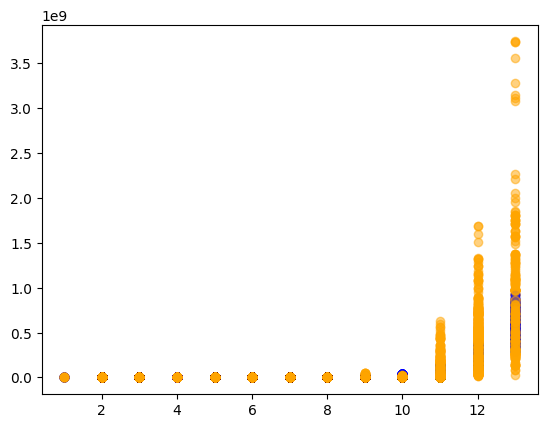

In [7]:
def logLinearRegression(df_train, df_predict):
    X = df_train[features]
    y = df_train['units']
    X_predict = df_predict[features]
    y_predict = df_predict['units']
    y_log = np.log(y)
    model = LinearRegression()
    model.fit(X, y_log)
    log_predictions = model.predict(X_predict)
    predictions = np.exp(log_predictions)

    mse = mean_squared_error(y_predict, predictions)
    plt.scatter(X_predict['Tree Width'], y_predict  , color = 'blue'  , alpha = 0.5)
    plt.scatter(X_predict['Tree Width'], predictions, color = 'orange', alpha = 0.5)
    return mse
    # print(f"MSE: {mse / 1e14}")
    # plt.show()

mse = 0
for i in range(5):
    l=i*2
    r=l+2
    df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
    df_train = df.drop(df_predict.index)
    mse += logLinearRegression(df_train, df_predict)

print(mse / 1e14)
plt.show()

C:\Users\jerry\AppData\Local\Temp\ipykernel_32736\3695572778.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\AppData\Local\Temp\ipykernel_32736\3695572778.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\A

32.5759039655859


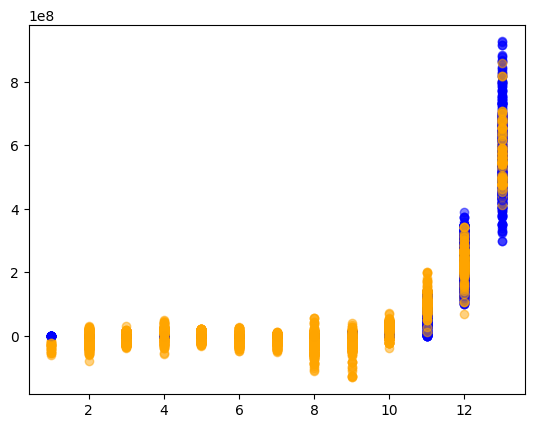

In [20]:
def polynomialLinearRegression(df_train, df_predict):
    X = df_train[features]
    y = df_train['units']
    X_predict = df_predict[features]
    y_predict = df_predict['units']
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    predictions = model.predict(poly.fit_transform(X_predict))

    mse = mean_squared_error(y_predict, predictions)
    plt.scatter(X_predict['Tree Width'], y_predict  , color = 'blue'  , alpha = 0.5)
    plt.scatter(X_predict['Tree Width'], predictions, color = 'orange', alpha = 0.5)
    return mse
    # print(f"MSE: {mse / 1e14}")
    # plt.show()
    
mse = 0
for i in range(5):
    l=i*2
    r=l+2
    df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
    df_train = df.drop(df_predict.index)
    mse += polynomialLinearRegression(df_train, df_predict)

print(mse / 1e14)
plt.show()

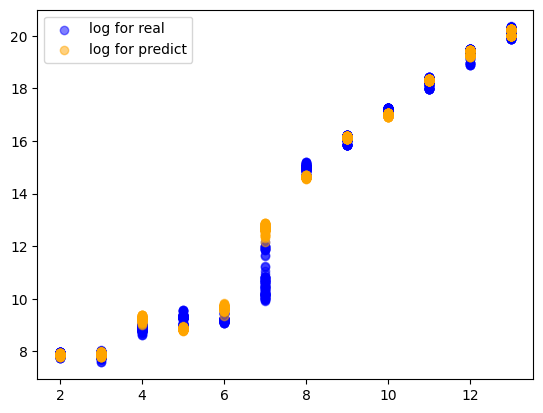

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data_df = pd.read_csv('data.csv')
features = ['Tree Width', 'Decomposition Overhead Ratio', 'Average Depth', 'Sum of Join node distances', 'Branching Factor', 'Bag Adjacency Factor', 'Bag Connectedness Factor', 'Bag Neighborhood Coverage Factor']
data_df['ln units'] = np.log(data_df['units'])

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X = [data_df[data_df['Tree Width'] == i][features] for i in range(15)]
y = [data_df[data_df['Tree Width'] == i]['units' ] for i in range(15)]

X_predict = []
y_predict = []

for i in range(15):
    X_predict.append([])
    y_predict.append([])
    
    if(len(X[i]) == 0 or i < 2): continue
    
    X_predict[i] = X[i][-100:]
    y_predict[i] = y[i][-100:]
    
    X[i] = X[i][:-100]
    y[i] = y[i][:-100]
    
    poly = PolynomialFeatures(degree = 1)
    X_poly = poly.fit_transform(X[i])
    model = LinearRegression()
    model.fit(X_poly, y[i])
    predictions = model.predict(poly.fit_transform(X_predict[i]))
    
    if(i == 3): plt.legend()
    plt.scatter(X_predict[i]['Tree Width'], np.log(y_predict[i])  , color = 'blue'  , alpha = 0.5, label = 'log for real')
    plt.scatter(X_predict[i]['Tree Width'], np.log(predictions)   , color = 'orange', alpha = 0.5, label = 'log for predict')

plt.show()
